In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ml_help
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from time import time
sns.set_theme()

# Load data

In [2]:
df = pd.read_csv("./data/gardiner_flow_weather_incidents.csv.zip")
df

,currentSpeed,magnitudeOfDelay,length,delay,dist_from_mid_point,visibility,temperature,FeelsLike,humidity,windSpeed,...,month_10,month_11,month_12,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,94.0,2.0,372.91800,199.0,-1.000000,10.0,18.69,18.68,79.0,2.57,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,94.0,0.0,302.76535,0.0,7.069406,10.0,18.69,18.68,79.0,2.57,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,94.0,0.0,302.76535,0.0,7.069406,10.0,18.69,18.68,79.0,2.57,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,94.0,0.0,273.82825,0.0,-1.000000,10.0,18.69,18.68,79.0,2.57,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,94.0,0.0,254.24487,0.0,7.111841,10.0,18.69,18.68,79.0,2.57,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94011,92.0,0.0,0.00000,0.0,-1.000000,10.0,9.77,6.07,41.0,9.26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
94012,92.0,0.0,0.00000,0.0,-1.000000,10.0,9.77,6.07,41.0,9.26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
94013,79.0,3.0,432.59130,136.0,7.111841,10.0,9.64,5.90,40.0,9.26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
94014,92.0,1.0,735.00830,148.0,-1.000000,10.0,9.61,5.86,40.0,9.26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
X = df.drop("currentSpeed",axis=1)
y = df["currentSpeed"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [4]:
metrics = pd.read_csv("./metrics/124_best_metrics.csv.zip")
metrics

,model,r2,mae,mse,rmse,mape,time_to_fit,time_to_predict
0,XGBoost,0.915774,2.650783,19.162463,4.377495,0.036145,12.417483,0.109757
1,MLP,0.847440,3.720088,34.709250,5.891456,0.051725,110.191004,0.034323
2,Random Forest,0.731039,5.008483,61.191650,7.822509,0.071916,20.444470,0.074738
3,Decision Tree,0.712580,5.105892,65.391412,8.086496,0.073449,0.335932,0.005523


# Load models

## XGBoost

### Run CV

In [5]:
import xgboost as xgb

params = ml_help.params_to_dict("123_xgboost")

In [6]:
xgboost_pipeline = make_pipeline(StandardScaler(),xgb.XGBRegressor(**params, n_jobs=12))

xgb_cv_metrics = ml_help.run_stratified_kfold("XGBoost",xgboost_pipeline,X_train,y_train)
xgb_cv_metrics

/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Running fold 0...
Fold 0 took 13.8156898021698 seconds to fit!
Running fold 1...
Fold 1 took 13.653745651245117 seconds to fit!
Running fold 2...
Fold 2 took 13.84907341003418 seconds to fit!
Running fold 3...
Fold 3 took 14.271412134170532 seconds to fit!
Running fold 4...
Fold 4 took 14.189461708068848 seconds to fit!
Running fold 5...
Fold 5 took 14.17479133605957 seconds to fit!
Running fold 6...
Fold 6 took 14.196473121643066 seconds to fit!
Running fold 7...
Fold 7 took 14.307966470718384 seconds to fit!
Running fold 8...
Fold 8 took 13.680191278457642 seconds to fit!
Running fold 9...
Fold 9 took 13.242608070373535 seconds to fit!


{'model': 'XGBoost',
 'r2': 0.92063267708926,
 'mae': 2.5619589201667226,
 'mape': 0.03489576074177398,
 'mse': 17.915966684873002,
 'rmse': 4.232226101343819,
 'time_to_fit': 13.938141298294067}

### Test using previously unseen data

In [7]:
xgboost_pipeline = make_pipeline(StandardScaler(),xgb.XGBRegressor(**params, n_jobs=12))

start = time()
pipe = xgboost_pipeline.fit(X_train,y_train)
end = time()

y_pred = pipe.predict(X_test)

xgb_metrics = ml_help.get_metrics_reg("XGBoost",y_test,y_pred)
xgb_metrics["time_to_fit"] = end-start
xgb_metrics

{'model': 'XGBoost',
 'r2': 0.9211031762929492,
 'mae': 2.5472382513215455,
 'mse': 17.704173059854792,
 'rmse': 4.207632714467221,
 'mape': 0.03469708945890111,
 'time_to_fit': 13.421544790267944}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


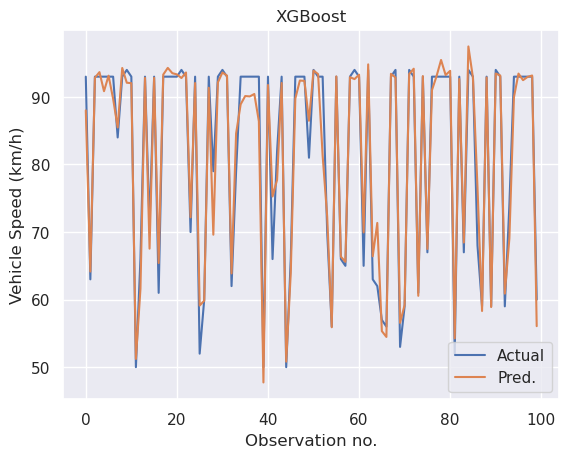

In [8]:
ml_help.plot_prediction(y_test, y_pred, "XGBoost", "Vehicle Speed (km/h)", "125_xgboost_predictions")

## Random Forest

### Run CV

In [9]:
from sklearn.ensemble import RandomForestRegressor

params = ml_help.params_to_dict("123_random_forest")

In [10]:
random_forest_pipeline = make_pipeline(StandardScaler(),RandomForestRegressor(**params,n_jobs=12))

random_forest_cv_metrics = ml_help.run_stratified_kfold("Random Forest",random_forest_pipeline,X_train,y_train)
random_forest_cv_metrics

/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Running fold 0...
Fold 0 took 3.972081422805786 seconds to fit!
Running fold 1...
Fold 1 took 3.8771238327026367 seconds to fit!
Running fold 2...
Fold 2 took 3.8932013511657715 seconds to fit!
Running fold 3...
Fold 3 took 3.9585630893707275 seconds to fit!
Running fold 4...
Fold 4 took 3.900524377822876 seconds to fit!
Running fold 5...
Fold 5 took 3.9186363220214844 seconds to fit!
Running fold 6...
Fold 6 took 3.909254550933838 seconds to fit!
Running fold 7...
Fold 7 took 3.9615097045898438 seconds to fit!
Running fold 8...
Fold 8 took 3.952449321746826 seconds to fit!
Running fold 9...
Fold 9 took 3.8900136947631836 seconds to fit!


{'model': 'Random Forest',
 'r2': 0.7300516675967683,
 'mae': 5.012177036251418,
 'mape': 0.0719397056472172,
 'mse': 60.93716693605832,
 'rmse': 7.805867746976371,
 'time_to_fit': 3.9233357667922975}

### Test using previously unseen data

In [11]:
random_forest_pipeline = make_pipeline(StandardScaler(),RandomForestRegressor(**params, n_jobs=12))

start = time()
pipe = random_forest_pipeline.fit(X_train,y_train)
end = time()

y_pred = pipe.predict(X_test)

random_forest_metrics = ml_help.get_metrics_reg("Random Forest",y_test,y_pred)
random_forest_metrics["time_to_fit"] = end-start
random_forest_metrics

{'model': 'Random Forest',
 'r2': 0.7287267262559254,
 'mae': 4.9993818532456755,
 'mse': 60.87277990697191,
 'rmse': 7.8021009931281915,
 'mape': 0.07131319080736084,
 'time_to_fit': 4.518569469451904}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


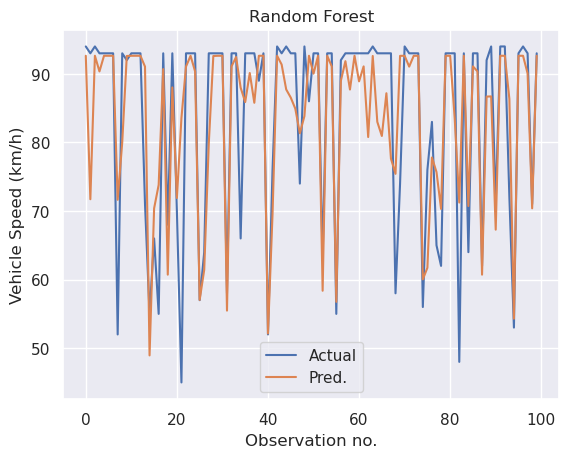

In [12]:
ml_help.plot_prediction(y_test, y_pred, "Random Forest", "Vehicle Speed (km/h)", "125_random_forest_predictions")

## Decision Tree

### Run CV

In [13]:
from sklearn.tree import DecisionTreeRegressor

params = ml_help.params_to_dict("123_decision_tree")

In [15]:
decision_tree_pipeline = make_pipeline(StandardScaler(),DecisionTreeRegressor(**params))

dtr_cv_metrics = ml_help.run_stratified_kfold("Decision Tree",decision_tree_pipeline,X_train,y_train)
dtr_cv_metrics

/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Running fold 0...
Fold 0 took 0.4166529178619385 seconds to fit!
Running fold 1...
Fold 1 took 0.3898277282714844 seconds to fit!
Running fold 2...
Fold 2 took 0.39426088333129883 seconds to fit!
Running fold 3...
Fold 3 took 0.4261643886566162 seconds to fit!
Running fold 4...
Fold 4 took 0.4107027053833008 seconds to fit!
Running fold 5...
Fold 5 took 0.42252063751220703 seconds to fit!
Running fold 6...
Fold 6 took 0.44291114807128906 seconds to fit!
Running fold 7...
Fold 7 took 0.41052770614624023 seconds to fit!
Running fold 8...
Fold 8 took 0.4118356704711914 seconds to fit!
Running fold 9...
Fold 9 took 0.4546935558319092 seconds to fit!


{'model': 'Decision Tree',
 'r2': 0.7095046966364917,
 'mae': 5.1092694035624815,
 'mape': 0.073370122840519,
 'mse': 65.57499851168093,
 'rmse': 8.097437929399655,
 'time_to_fit': 0.41800973415374754}

### Test using previously unseen data

In [16]:
decision_tree_pipeline = make_pipeline(StandardScaler(),DecisionTreeRegressor(**params))

start = time()
pipe = decision_tree_pipeline.fit(X_train,y_train)
end = time()

y_pred = pipe.predict(X_test)

dtr_metrics = ml_help.get_metrics_reg("Decision Tree",y_test,y_pred)
dtr_metrics["time_to_fit"] = end-start
dtr_metrics

{'model': 'Decision Tree',
 'r2': 0.7111315541632419,
 'mae': 5.0838547790282655,
 'mse': 64.82107537832628,
 'rmse': 8.051153667538975,
 'mape': 0.07250426740676431,
 'time_to_fit': 0.5051615238189697}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


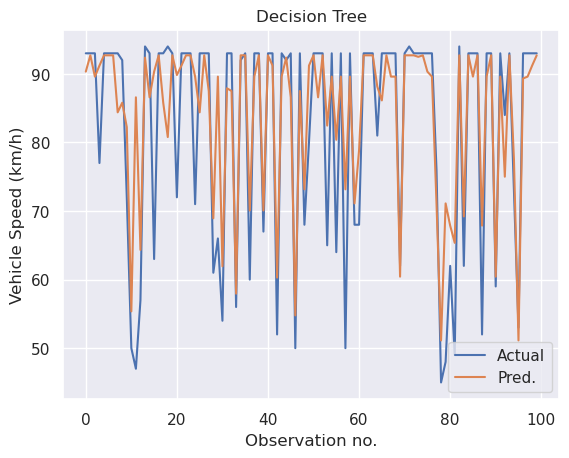

In [17]:
ml_help.plot_prediction(y_test, y_pred, "Decision Tree", "Vehicle Speed (km/h)", "125_decision_tree_predictions")

## MLP

### Run CV

In [18]:
from sklearn.neural_network import MLPRegressor

params = ml_help.params_to_dict("123_mlpr")

In [20]:
mlp_pipeline = make_pipeline(StandardScaler(),MLPRegressor(**params))

mlp_cv_metrics = ml_help.run_stratified_kfold("MLP",mlp_pipeline,X_train,y_train)
mlp_cv_metrics

/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Running fold 0...
Fold 0 took 251.61385989189148 seconds to fit!
Running fold 1...
Fold 1 took 258.29304122924805 seconds to fit!
Running fold 2...
Fold 2 took 240.59623169898987 seconds to fit!
Running fold 3...
Fold 3 took 246.61531972885132 seconds to fit!
Running fold 4...
Fold 4 took 254.9741337299347 seconds to fit!
Running fold 5...
Fold 5 took 198.3236219882965 seconds to fit!
Running fold 6...
Fold 6 took 266.0915651321411 seconds to fit!
Running fold 7...
Fold 7 took 225.5451843738556 seconds to fit!
Running fold 8...


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 8 took 292.7916433811188 seconds to fit!
Running fold 9...
Fold 9 took 204.1700050830841 seconds to fit!


{'model': 'MLP',
 'r2': 0.8673784145787689,
 'mae': 3.422998248134527,
 'mape': 0.04710751615389321,
 'mse': 29.936908979022036,
 'rmse': 5.4692513366247875,
 'time_to_fit': 243.90146062374114}

### Test using previously unseen data

In [21]:
mlp_pipeline = make_pipeline(StandardScaler(),MLPRegressor(**params))

start = time()
pipe = mlp_pipeline.fit(X_train,y_train)
end = time()

y_pred = pipe.predict(X_test)

mlp_metrics = ml_help.get_metrics_reg("MLP",y_test,y_pred)
mlp_metrics["time_to_fit"] = end-start
mlp_metrics

{'model': 'MLP',
 'r2': 0.8679560732110763,
 'mae': 3.5959809817089163,
 'mse': 29.630198296119588,
 'rmse': 5.443362774620077,
 'mape': 0.04901094791660249,
 'time_to_fit': 299.76160502433777}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


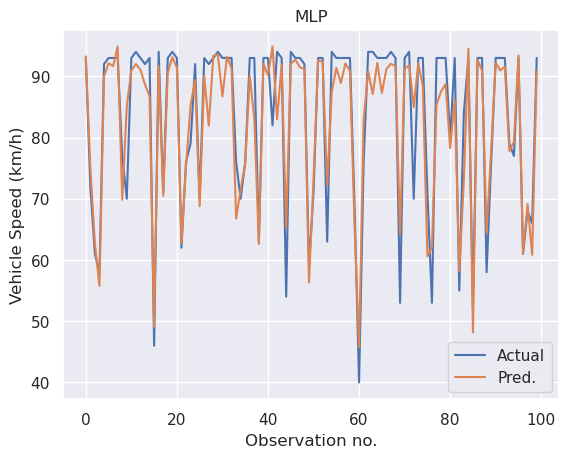

In [22]:
ml_help.plot_prediction(y_test, y_pred, "MLP", "Vehicle Speed (km/h)", "125_mlp_predictions")

# Store metrics

In [23]:
metrics_cv = pd.concat([pd.DataFrame(xgb_cv_metrics,index=[0]),pd.DataFrame(random_forest_cv_metrics,index=[0]),pd.DataFrame(dtr_cv_metrics,index=[0]),pd.DataFrame(mlp_cv_metrics,index=[0])])
metrics_cv.to_csv("./metrics/125_gardiner_flow_weather_incidents_cv_metrics.csv.zip",index=False,compression="zip")

metrics = pd.concat([pd.DataFrame(xgb_metrics,index=[0]),pd.DataFrame(random_forest_metrics,index=[0]),pd.DataFrame(dtr_metrics,index=[0]),pd.DataFrame(mlp_metrics,index=[0])])
metrics.to_csv("./metrics/125_gardiner_flow_weather_incidents_metrics.csv.zip",index=False,compression="zip")

In [2]:
metrics = pd.read_csv("./metrics/125_gardiner_flow_weather_incidents_metrics.csv.zip")
metrics

,model,r2,mae,mse,rmse,mape,time_to_fit
0,XGBoost,0.921103,2.547238,17.704173,4.207633,0.034697,13.421545
1,Random Forest,0.728727,4.999382,60.872780,7.802101,0.071313,4.518569
2,Decision Tree,0.711132,5.083855,64.821075,8.051154,0.072504,0.505162
3,MLP,0.867956,3.595981,29.630198,5.443363,0.049011,299.761605


# Print CV metrics

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


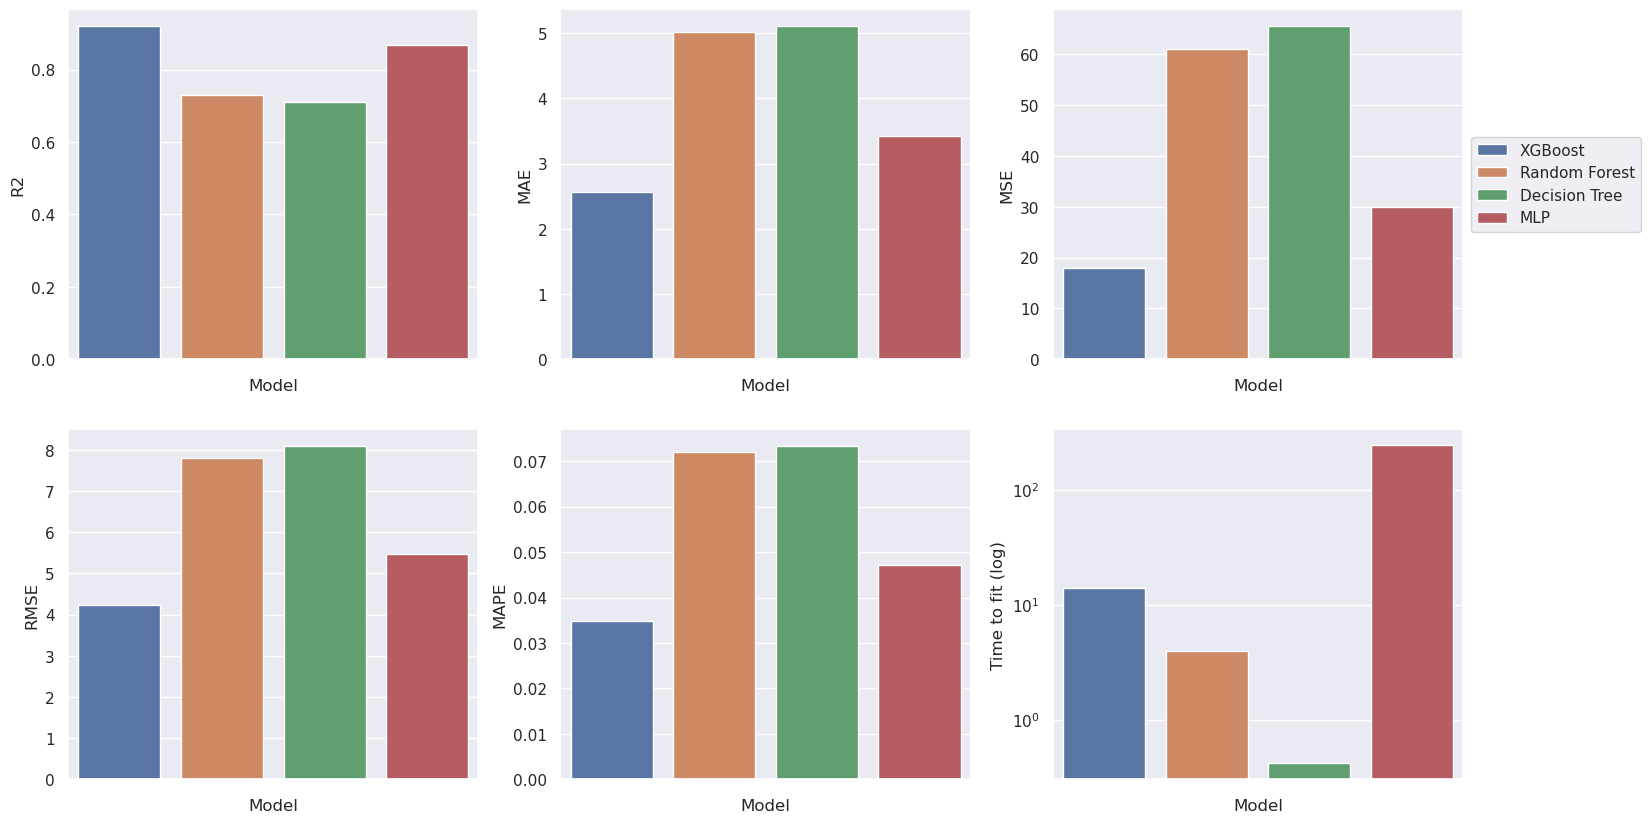

In [24]:
sns.set_theme()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.barplot(ax=axes[0, 0], data=metrics_cv, x='model', y='r2',hue="model",dodge=False)
sns.barplot(ax=axes[0, 1], data=metrics_cv, x='model', y='mae',hue="model",dodge=False)
sns.barplot(ax=axes[0, 2], data=metrics_cv, x='model', y='mse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 0], data=metrics_cv, x='model', y='rmse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 1], data=metrics_cv, x='model', y='mape',hue="model",dodge=False)
sns.barplot(ax=axes[1, 2], data=metrics_cv, x='model', y='time_to_fit',hue="model",dodge=False)

axes[0, 0].set(xlabel="Model",xticklabels=[])
axes[0, 0].set(ylabel="R2")
axes[0, 0].get_legend().remove()

axes[0, 1].set(xlabel="Model",xticklabels=[])
axes[0, 1].set(ylabel="MAE")
axes[0, 1].get_legend().remove()

axes[0, 2].set(xlabel="Model",xticklabels=[])
axes[0, 2].set(ylabel="MSE")
axes[0, 2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axes[1, 0].set(xlabel="Model",xticklabels=[])
axes[1, 0].set(ylabel="RMSE")
axes[1, 0].get_legend().remove()

axes[1, 1].set(xlabel="Model",xticklabels=[])
axes[1, 1].set(ylabel="MAPE")
axes[1, 1].get_legend().remove()

axes[1, 2].set(xlabel="Model",xticklabels=[])
axes[1, 2].set(ylabel="Time to fit (log)", yscale="log")
axes[1, 2].get_legend().remove()

plt.savefig("./plots/125_gardiner_flow_weather_incidents_cv_metrics.eps",format="eps",bbox_inches="tight")
plt.savefig("./plots/125_gardiner_flow_weather_incidents_cv_metrics.png",bbox_inches="tight")

# Print metrics

In [8]:
metrics = metrics.sort_values(by="r2", ascending=False)
metrics

,model,r2,mae,mse,rmse,mape,time_to_fit
0,XGBoost,0.921103,2.547238,17.704173,4.207633,0.034697,13.421545
3,MLP,0.867956,3.595981,29.630198,5.443363,0.049011,299.761605
1,Random Forest,0.728727,4.999382,60.872780,7.802101,0.071313,4.518569
2,Decision Tree,0.711132,5.083855,64.821075,8.051154,0.072504,0.505162


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


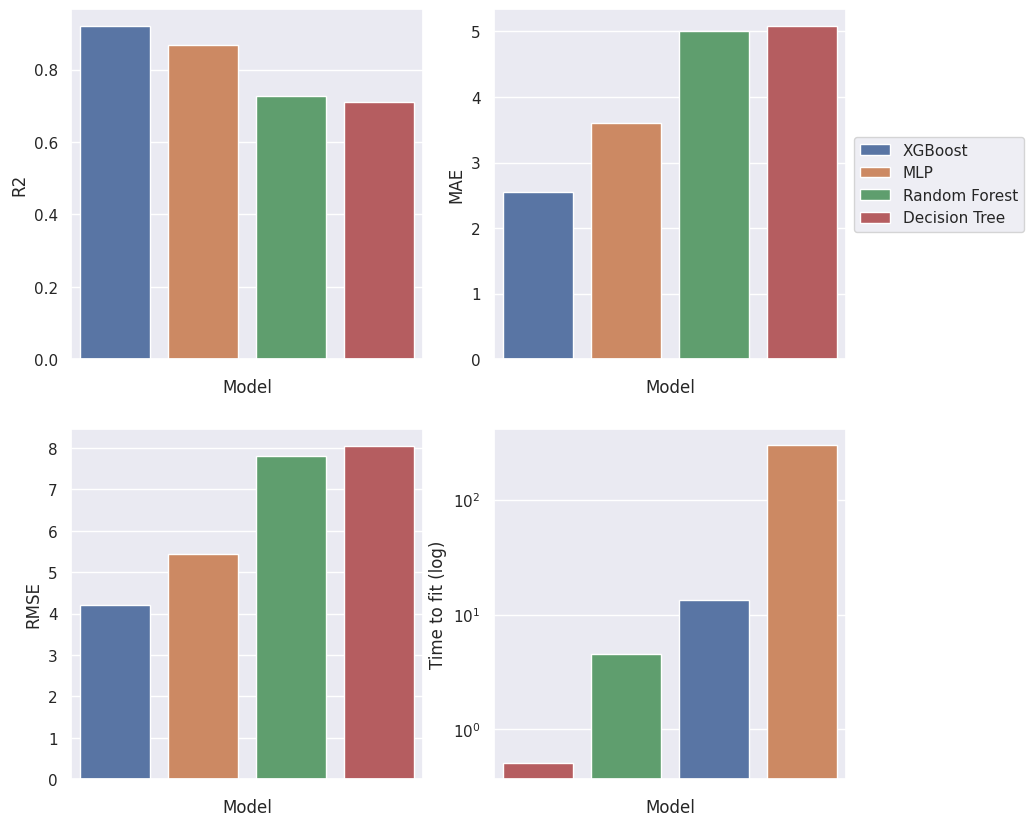

In [9]:
ttf_order = list(metrics.sort_values(by="time_to_fit")["model"])

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.barplot(ax=axes[0, 0], data=metrics, x='model', y='r2',hue="model",dodge=False)
sns.barplot(ax=axes[0, 1], data=metrics, x='model', y='mae',hue="model",dodge=False)
# sns.barplot(ax=axes[0, 2], data=metrics, x='model', y='mse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 0], data=metrics, x='model', y='rmse',hue="model",dodge=False)
# sns.barplot(ax=axes[1, 1], data=metrics, x='model', y='mape',hue="model",dodge=False)
sns.barplot(ax=axes[1, 1], data=metrics, x='model', y='time_to_fit',hue="model",dodge=False,order=ttf_order)

axes[0, 0].set(xlabel="Model",xticklabels=[])
axes[0, 0].set(ylabel="R2")
axes[0, 0].get_legend().remove()

axes[0, 1].set(xlabel="Model",xticklabels=[])
axes[0, 1].set(ylabel="MAE")
axes[0, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# axes[0, 2].set(xlabel="Model",xticklabels=[])
# axes[0, 2].set(ylabel="MSE")
# axes[0, 2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axes[1, 0].set(xlabel="Model",xticklabels=[])
axes[1, 0].set(ylabel="RMSE")
axes[1, 0].get_legend().remove()

# axes[1, 1].set(xlabel="Model",xticklabels=[])
# axes[1, 1].set(ylabel="MAPE")
# axes[1, 1].get_legend().remove()

axes[1, 1].set(xlabel="Model",xticklabels=[])
axes[1, 1].set(ylabel="Time to fit (log)", yscale="log")
axes[1, 1].get_legend().remove()

plt.savefig("./plots/125_gardiner_flow_weather_incidents_metrics.eps",format="eps",bbox_inches="tight")
plt.savefig("./plots/125_gardiner_flow_weather_incidents_metrics.png",bbox_inches="tight")
plt.savefig("./plots/125_gardiner_flow_weather_incidents_metrics.pdf",bbox_inches="tight")